<a href="https://colab.research.google.com/github/sahmuskan17/Diwali-Sales-Analysis/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diwali Sales Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('/content/Diwali Sales Data.csv',encoding = 'unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### Here we cann see that unmaned1 and status column doesnt contain any value so here we have to delete these two columns

In [ ]:
#To delete status and unnamed1 column
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [ ]:
#checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
# Remove null values of amount column
df.dropna(inplace = True)
df.shape

(11239, 13)

In [ ]:
#Here we want to change the datatype of amount from float to int
df['Amount'] = df['Amount'] .astype('int')
df['Amount'].dtypes



dtype('int64')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender Count

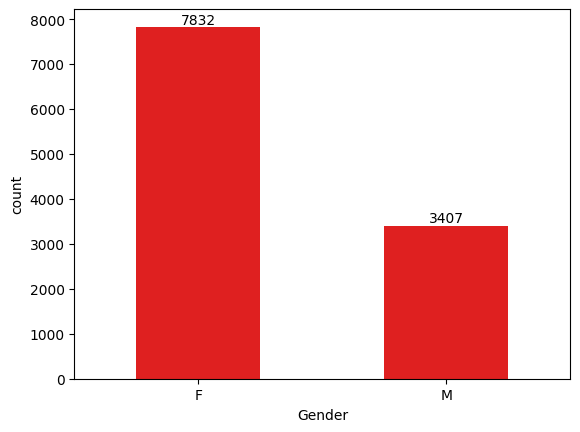

In [ ]:
ax=sns.countplot(x = 'Gender', data = df, width = 0.5, color = 'r')
for bars in ax.containers:
  ax.bar_label(bars)

### Gender vs Amount

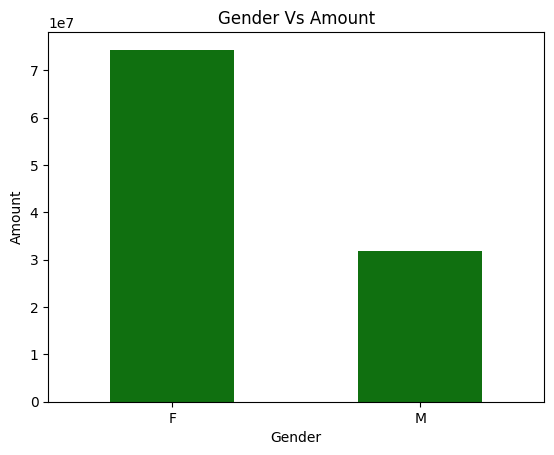

In [ ]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by ='Amount' , ascending = False)
a=sns.barplot(x ='Gender', y = 'Amount',data = sales_gen, width = 0.5, color = 'g')
plt.title('Gender Vs Amount')
plt.show()


###### From above graphs we can see that most of the buyers are females and even the purchasing power of females are higher than male

## Count of Gender on the basis of Age-Group

<Axes: xlabel='Age Group', ylabel='count'>

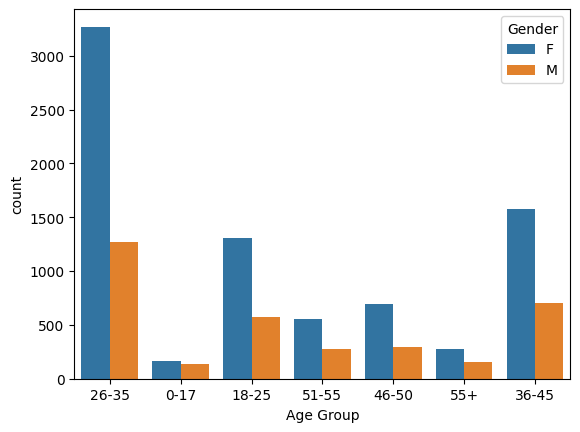

In [ ]:
sns.countplot(x = 'Age Group',hue = 'Gender', data = df)

## Total amount Vs Age- Group

<ipython-input-37-37d82bb07d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, palette=custom_colors)


<Axes: xlabel='Age Group', ylabel='Amount'>

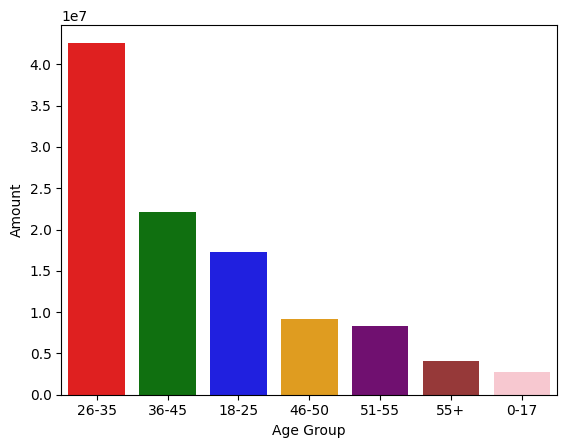

In [ ]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, palette=custom_colors)


##### From the above graph we can see that most of the buyers are female of 26-35 age group

## Total no of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

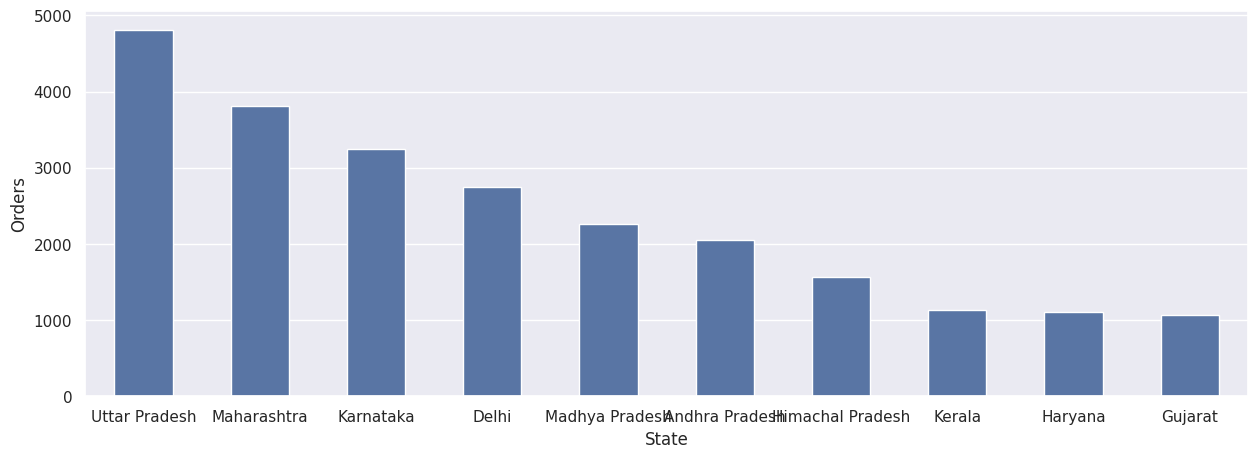

In [10]:
state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x ='State', y = 'Orders', data = state, width = 0.5)

## Total amount vs sales from top 10 states

<Axes: xlabel='State', ylabel='Amount'>

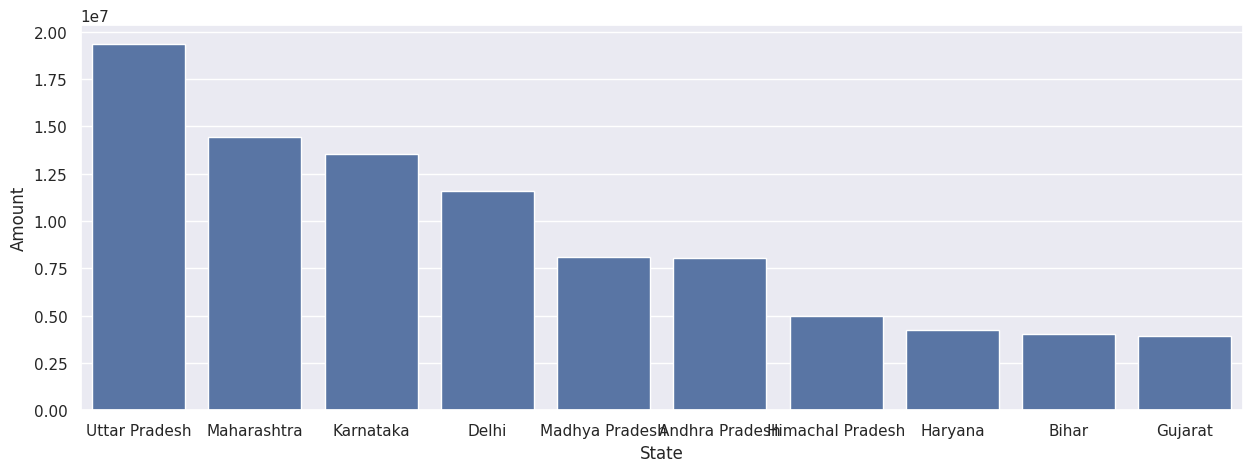

In [9]:
state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x ='State', y = 'Amount', data = state)

##### From the above graph we can see that most of revenue is generated from UP, Maharastra and Karnataka

## Marital Status

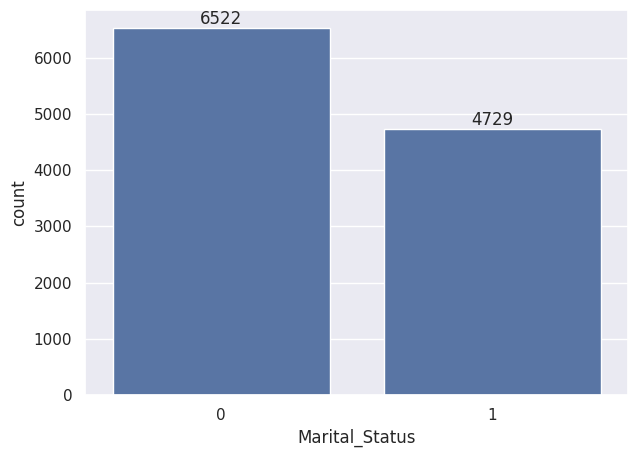

In [24]:
a = sns.countplot(x = 'Marital_Status', data = df)
sns.set(rc = {'figure.figsize':(7,5)})
for bars in a.containers:
  a.bar_label(bars)
plt.show()


##### 0 represents married people and 1 represents single


<Axes: xlabel='Marital_Status', ylabel='Amount'>

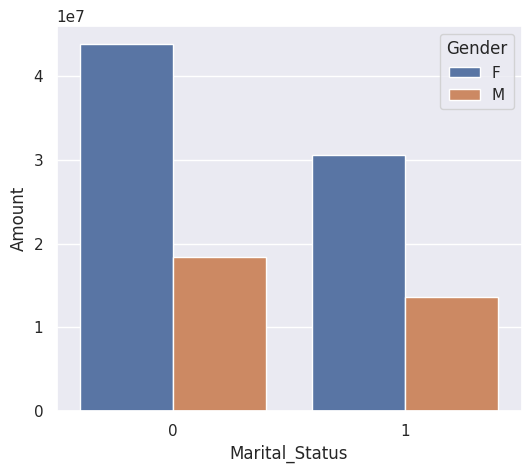

In [26]:
m = df.groupby(['Marital_Status', 'Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x ='Marital_Status', y ='Amount', hue = 'Gender', data = m)

##### Here we can see that most of the buyers are married women and their purchasing power are high

## Occupation

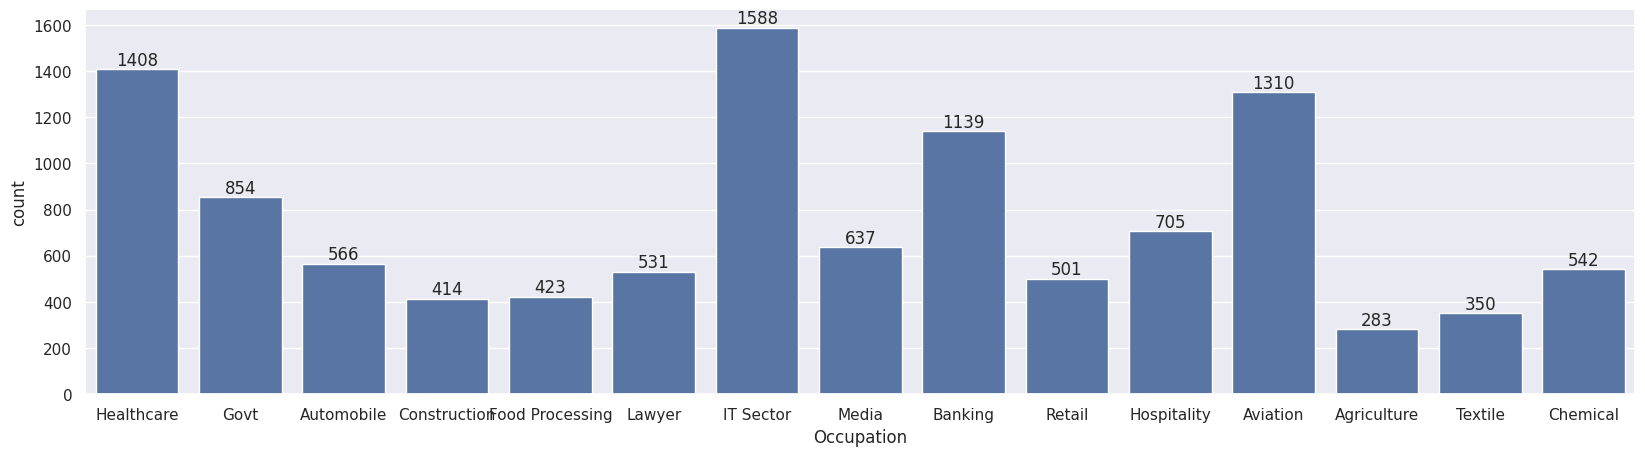

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
a = sns.countplot(x = 'Occupation', data = df)
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

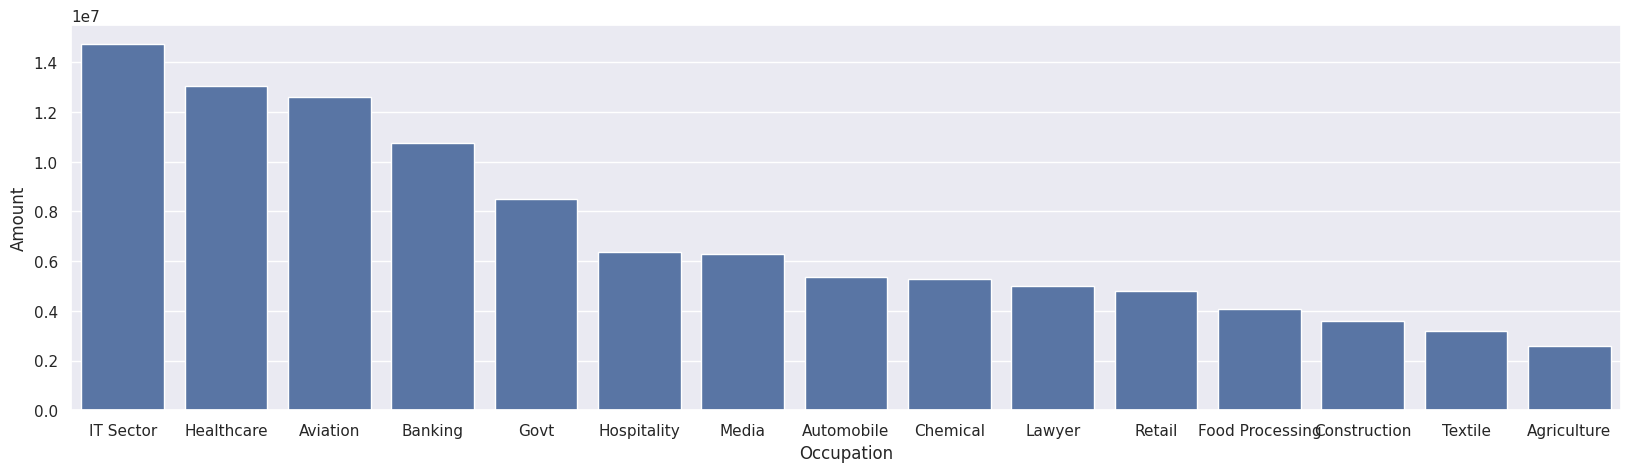

In [29]:
o = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = o)

##### From the above graph we can see that most of the buyers are from IT, healthcare and aviation Sectors

## Product Category

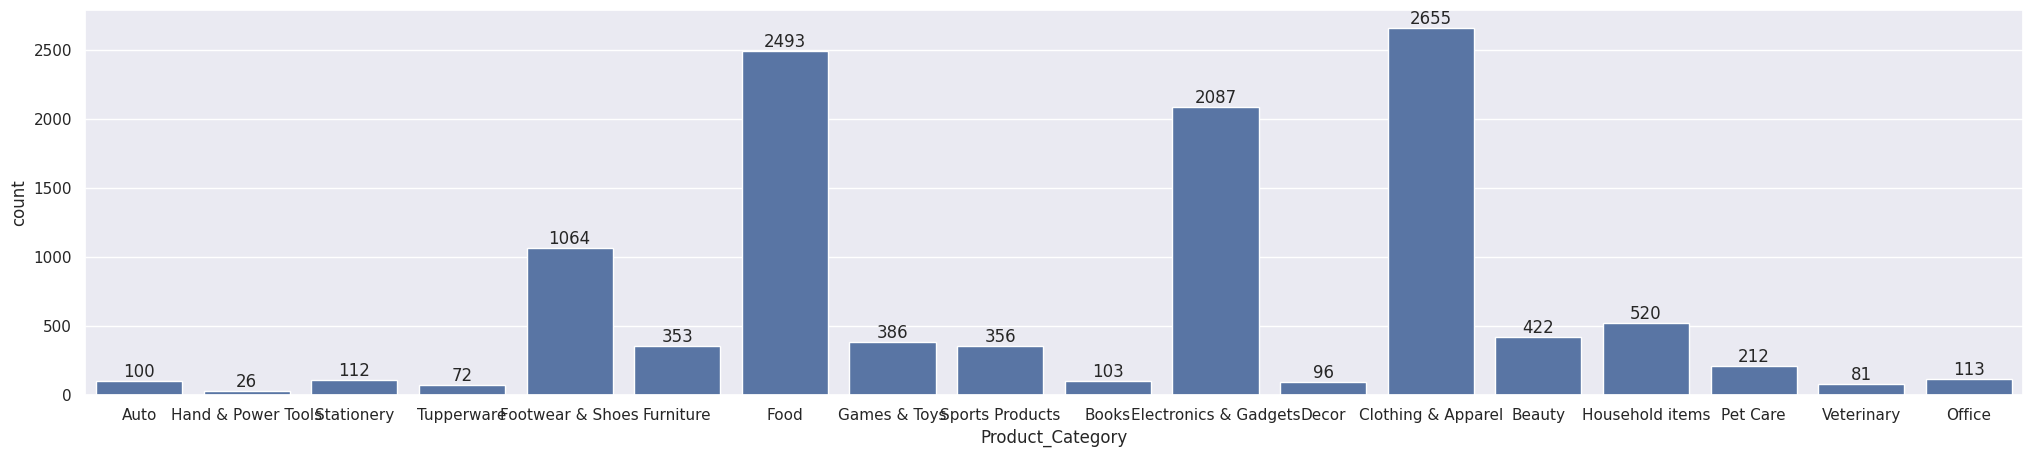

In [31]:
sns.set(rc={'figure.figsize':(25,5)})
a = sns.countplot(x = 'Product_Category', data = df)
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

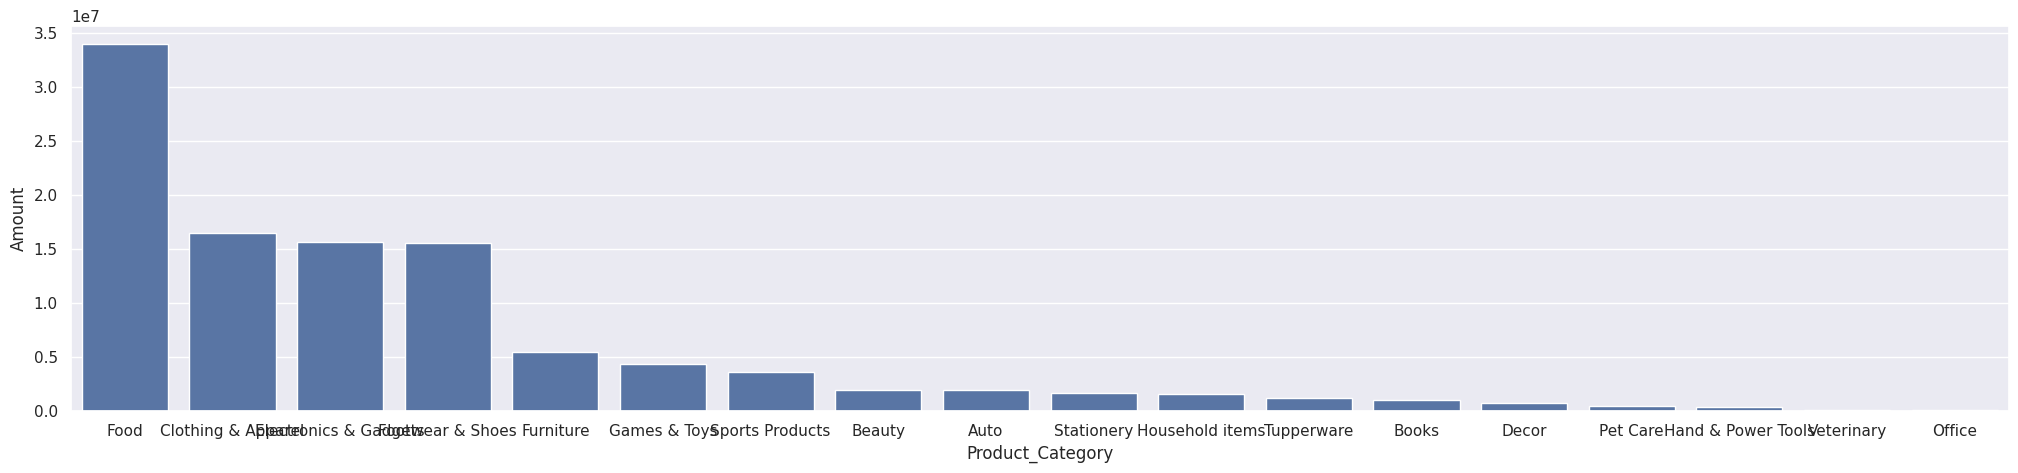

In [32]:
p = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = p)

##### From the above graph most of the sold products are from food and clothing

## Conclusion

##### Married women of age-group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronic category